In [1]:
%matplotlib inline

from __future__ import division, print_function

import os
import scipy.io.arff as arff
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
from matplotlib import gridspec
from cycler import cycler

from sklearn import tree
from IPython.display import Image

# os.chdir('/media/Data/Research Data/Evolving ES data/')
os.chdir('C:\\Users\\Sander\\surfdrive\\Research Data\\Evolving the Structure of Evolution Strategies\\experiments\\BF runs')
fname = 'bruteforce_{}_f{}.arff'
cases = {dim: {} for dim in [2, 3, 5, 10, 20]}

for dim in [2, 3, 5, 10, 20]:
    for fid in range(1, 25):
        case = arff.loadarff('arff/' + fname.format(dim, fid))[0]
        case = np.array([list(dat) for dat in case])
        cases[dim][fid] = case

In [2]:
min_column = [0] * 2304
min_column.extend(range(1,2305))
min_column = np.array(min_column).reshape((4608,1))

max_column = range(1, 2305)
max_column.extend([2304] * 2304)
max_column = np.array(max_column).reshape((4608,1))

min_columns = np.repeat(min_column, 9, axis=1)
max_columns = np.repeat(max_column, 9, axis=1)


min_column = [0] * 1536
min_column.extend(range(1,1537))
min_column.extend(range(1538, 4609, 2))
min_column = np.array(min_column).reshape((4608,1))

max_column = range(2, 3073, 2)
max_column.extend(range(3073,4609))
max_column.extend([4608] * 1536)
max_column = np.array(max_column).reshape((4608,1))

min_columns = np.hstack((min_columns, min_column, min_column))
max_columns = np.hstack((max_columns, max_column, max_column))

dists = max_columns - min_columns
dists[-1,:] = 1

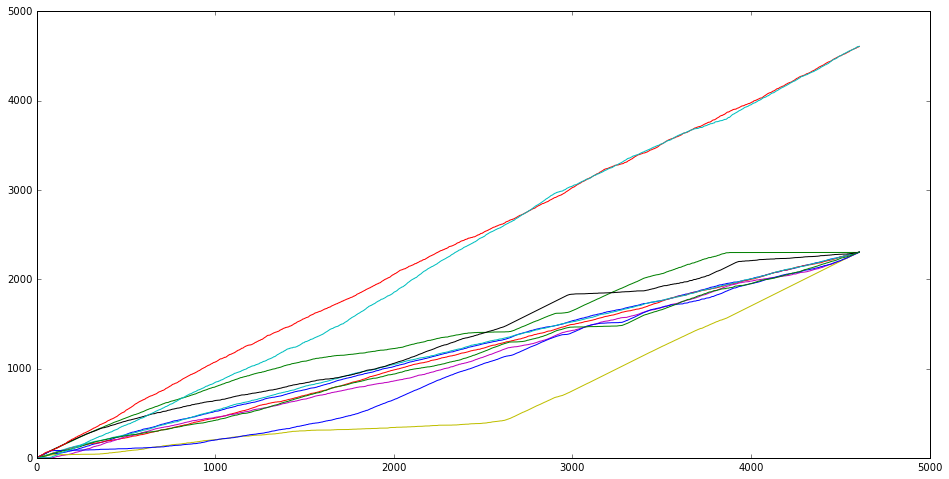

In [3]:
plt.figure(figsize=(16, 8))
plt.plot(np.cumsum(cases[2][1][cases[2][1][:,11].argsort()][:,:11], axis=0))
plt.show()

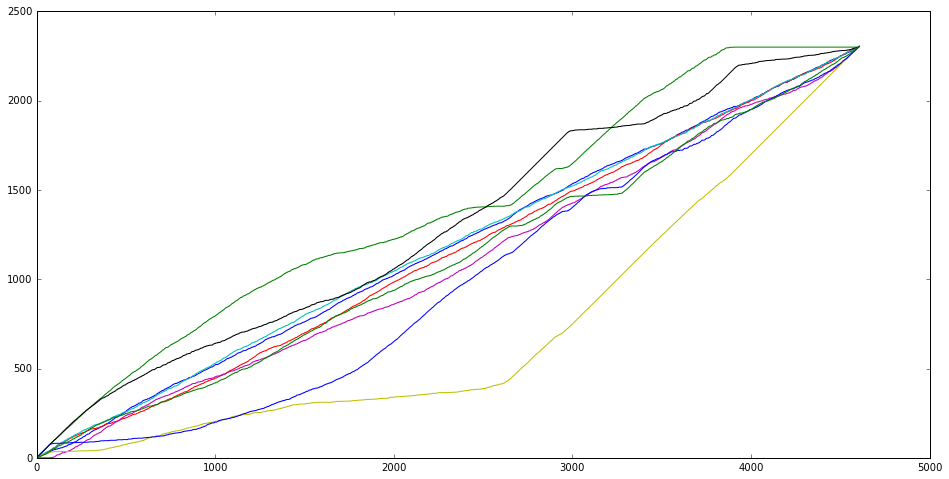

In [4]:
plt.figure(figsize=(16, 8))
plt.plot(np.cumsum(cases[2][1][cases[2][1][:,11].argsort()][:,:9], axis=0))
plt.show()

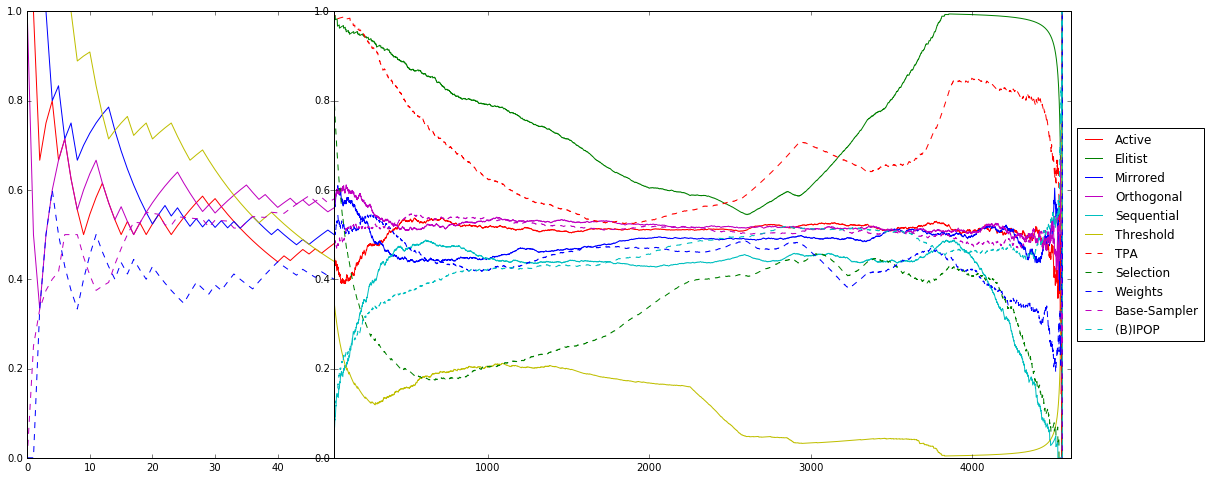

In [5]:
temp = np.cumsum(cases[2][1][ cases[2][1][:,11].argsort() ][:,:11], axis=0)
temp = temp - min_columns
temp = temp / dists

labels = ['Active', 'Elitist', 'Mirrored', 'Orthogonal', 'Sequential', 'Threshold', 'TPA', 'Selection', 'Weights', 'Base-Sampler', '(B)IPOP']
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'm', 'c', 'y', 'r', 'g', 'b', 'm', 'c', 'y']) +
                           cycler('linestyle', ['-', '-', '-', '-', '-', '-', '--', '--', '--', '--', '--', '--'])))

cutoff = 50

plt.figure(figsize=(22, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3]) 

ax1 = plt.subplot(gs[0])
ax1.plot(temp[:cutoff,:])
ax1.set_xlim([0, 49])

ax2 = plt.subplot(gs[1], sharey=ax1)
lines = ax2.plot(temp[cutoff:,:])
ax2.set_xlim([49,4608])

plt.subplots_adjust(wspace=0, hspace=0)

# Shrink current axis by 20%
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=lines, labels=labels)

plt.show()

In [6]:
labels = ['Active', 'Elitist', 'Mirrored', 'Orthogonal', 'Sequential', 'Threshold', 'TPA', 'Selection', 'Weights', 'Base-Sampler', '(B)IPOP']
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'm', 'c', 'y', 'r', 'g', 'b', 'm', 'c', 'y']) +
                           cycler('linestyle', ['-', '-', '-', '-', '-', '-', '--', '--', '--', '--', '--', '--'])))

for dim in [2, 3, 5, 10, 20]:
    for fid in range(1, 25):
        temp = np.cumsum(cases[dim][fid][ cases[dim][fid][:,11].argsort() ][:,:11], axis=0)
        temp = temp - min_columns
        temp = temp / dists
        
        cutoff = 50
        
        plt.figure(figsize=(22, 8))
        plt.suptitle("Progression for {}D F{}".format(dim, fid))
        gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3]) 
        
        ax1 = plt.subplot(gs[0])
        ax1.plot(temp[:cutoff,:])
        ax1.set_xlim([0, 49])
        
        ax2 = plt.subplot(gs[1], sharey=ax1)
        lines = ax2.plot(temp[cutoff:,:])
        ax2.set_xlim([49,4608])
        
        plt.subplots_adjust(wspace=0, hspace=0)

        # Shrink current axis by 20%
        box = ax2.get_position()
        ax2.set_position([box.x0, box.y0, box.width * 0.95, box.height])
        
        # Put a legend to the right of the current axis
        ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=lines, labels=labels)
        
        plt.savefig("plots/module_progression_{}_f{}.png".format(dim, fid))
        plt.savefig("plots/module_progression_{}_f{}.pdf".format(dim, fid))
        
        plt.close()

In [7]:
for dim in [2, 3, 5, 10, 20]:
    for fid in range(1, 25):
        temp = cases[dim][fid][ cases[dim][fid][:,11].argsort() ][:,11]
        
        plt.figure(figsize=(16, 8))
        plt.suptitle("Single value plot of 'ERT else FCE' for {}D F{}".format(dim, fid))
        
        plt.plot(temp)
        plt.yscale('log')
                
        plt.savefig("plots/single_ERT_FCE_{}_f{}.png".format(dim, fid))
        plt.savefig("plots/single_ERT_FCE_{}_f{}.pdf".format(dim, fid))
        
        plt.close()

In [10]:
import gc

for dim in [2, 3, 5, 10, 20]:
    for fid in range(1, 25):
        temp = np.count_nonzero(cases[dim][fid][ cases[dim][fid][:,11].argsort() ][:,:11], axis=1)

        plt.figure(figsize=(16, 8))
        plt.suptitle("Number of active modules vs ranking for {}D F{}".format(dim, fid))
        
        plt.plot(temp)
                
        plt.savefig("plots/num_active_modules_{}_f{}.png".format(dim, fid))
        plt.savefig("plots/num_active_modules_{}_f{}.pdf".format(dim, fid))
        
        plt.clf()
        plt.close()
        del temp
        gc.collect()

In [18]:
features = ['Active', 'Elitist', 'Mirrored', 'Orthogonal', 
            'Sequential', 'Threshold', 'TPA', 'Selection', 
            'Weights', 'Base-Sampler', '(B)IPOP']

for dim in [2, 3, 5, 10, 20]:
    for fid in range(1, 25):
        clf = tree.DecisionTreeRegressor(min_samples_split=50, min_samples_leaf=20)
        clf = clf.fit(cases[dim][fid][:,:11], cases[dim][fid][:,11])
        
        dot_data = tree.export_graphviz(clf, out_file=None,
                                        feature_names=features,
                                        class_names=['Fitness'],
                                        filled=True,
                                        rounded=True,
                                        )
        graph = pydotplus.graph_from_dot_data(dot_data)  
        graph.write_pdf("plots/regressor_tree_{}_f{}.pdf".format(dim, fid))
        graph.write_png("plots/regressor_tree_{}_f{}.png".format(dim, fid))

In [20]:
features = ['Active', 'Elitist', 'Mirrored', 'Orthogonal', 
            'Sequential', 'Threshold', 'TPA', 'Selection', 
            'Weights', 'Base-Sampler', '(B)IPOP']

for dim in [2, 3, 5, 10, 20]:
    for fid in range(1, 25):
        clf = tree.DecisionTreeRegressor(max_depth=4, min_samples_split=50, min_samples_leaf=20)
        clf = clf.fit(cases[dim][fid][:,:11], cases[dim][fid][:,11])
        
        dot_data = tree.export_graphviz(clf, out_file=None,
                                        feature_names=features,
                                        class_names=['Fitness'],
                                        # filled=True,
                                        rounded=True,
                                        )
        graph = pydotplus.graph_from_dot_data(dot_data)  
        graph.write_pdf("plots/small_regressor_tree_{}_f{}.pdf".format(dim, fid))
        graph.write_png("plots/small_regressor_tree_{}_f{}.png".format(dim, fid))